# NetworkX getting started

This tutorial provides a quick networkX introduction. There are more jupyter notebooks which covers the different topics in detail. 

Content:
- List uf useful functions
- Installing and importing networkx
- Manually creating graphs
- Reading & Writing graphs to Gephi format
- Basic filter and visualization


See also: https://networkx.github.io/documentation/stable/tutorial.html

## Installing and importing required libraries

In [1]:
# Go to the root folder and execute: pip install -r requirements.txt

In [2]:
import networkx as nx
import os
import sys
import matplotlib.pyplot as plt
from random import random

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from graphutil.print import print_network_information

## Usefull functions

- nx.isolates(G): Returns nodes without edges
- nx.freeze(G): Prevents adding and removing edges to the graph

## Creating a graph manually

NetworkX can handle many different graph types:
- Undirected graphs, use nx.Graph()
- Directed graphs, use nx.DiGraph() (has some additional functions like in_degree(), out_degree(), predecessors, successors). It can be transformed into an undirected graph using the to_undirected() method (some algorithms are only defined for directed / undirected graphs)
- nx.MultiGraph or nx.MultiDigraph(): Allows multiple edges between nodes. Attention: Most algorithms are not well defined on MultiGraphs.

In [5]:
G = nx.Graph(name="Sample-Graph")

In [6]:
michi_attr = dict(hobbies="schwimmen", wohnort='windisch')
alex_attr = dict(hobbies="fitness", wohnort='gebenstorf')
nadja_attr = dict(hobbies="gamen", wohnort='baden')
felix_attr = dict(hobbies="singen", wohnort='frick')
valentin_attr = dict(hobbies="auto", wohnort='frick')
dominik_attr = dict(hobbies="motorrad", wohnort='zürich')
julia_attr = dict(hobbies="lesen", wohnort='wettingen')
louis_attr = dict(hobbies="tanzen", wohnort='baden')

G.add_node("Michi", **michi_attr)
G.add_node("Alex", **alex_attr)
G.add_node("Nadja", **nadja_attr)
G.add_node("Felix", **felix_attr)
G.add_node("Valentin", **valentin_attr)
G.add_node("Dominik", **dominik_attr)
G.add_node("Julia", **julia_attr)
G.add_node("Louis", **louis_attr)

G.add_edge("Michi", "Dominik", weight=2)
G.add_edge("Michi", "Alex", weight=1)
G.add_edge("Michi", "Felix", weight=1)
G.add_edge("Felix", "Dominik", weight=1)
G.add_edge("Felix", "Valentin", weight=0.5)
G.add_edge("Alex", "Nadja", weight=1)
G.add_edge("Alex", "Dominik", weight=0.5)
G.add_edge("Louis", "Julia", weight=1)

In [7]:
print_network_information(G)

Information for given Graph with name 'Sample-Graph':
	Graph is directed: False
	Number of nodes: 8
	Number of edges: 8


In [8]:
print(f"Number of Nodes: {G.number_of_nodes()}")
print(*G.nodes(data=True), sep="\n")

Number of Nodes: 8
('Michi', {'hobbies': 'schwimmen', 'wohnort': 'windisch'})
('Alex', {'hobbies': 'fitness', 'wohnort': 'gebenstorf'})
('Nadja', {'hobbies': 'gamen', 'wohnort': 'baden'})
('Felix', {'hobbies': 'singen', 'wohnort': 'frick'})
('Valentin', {'hobbies': 'auto', 'wohnort': 'frick'})
('Dominik', {'hobbies': 'motorrad', 'wohnort': 'zürich'})
('Julia', {'hobbies': 'lesen', 'wohnort': 'wettingen'})
('Louis', {'hobbies': 'tanzen', 'wohnort': 'baden'})


In [9]:
print(f"Number of Edges: {G.number_of_edges()}")
print(*G.edges(data=True), sep="\n")

Number of Edges: 8
('Michi', 'Dominik', {'weight': 2})
('Michi', 'Alex', {'weight': 1})
('Michi', 'Felix', {'weight': 1})
('Alex', 'Nadja', {'weight': 1})
('Alex', 'Dominik', {'weight': 0.5})
('Felix', 'Dominik', {'weight': 1})
('Felix', 'Valentin', {'weight': 0.5})
('Julia', 'Louis', {'weight': 1})


In [10]:
# Changing node attributes
G.nodes["Nadja"]["wohnort"] = "gebenstorf"
print(f"Nadja's node attributes: {G.nodes['Nadja']}")
print(f"Nadja's wohnort node attributes: {G.nodes['Nadja']['wohnort']}")

Nadja's node attributes: {'hobbies': 'gamen', 'wohnort': 'gebenstorf'}
Nadja's wohnort node attributes: gebenstorf


In [11]:
print("Neighbours of Alex:")
print(*list(G.neighbors('Alex')), sep=" ")

Neighbours of Alex:
Michi Nadja Dominik


In [12]:
sortedByDegree = sorted(G.degree(), key=lambda item: item[1], reverse=True)
for node, degree in sortedByDegree:
        print(f"'{node}' has degree: {degree}")

'Michi' has degree: 3
'Alex' has degree: 3
'Felix' has degree: 3
'Dominik' has degree: 3
'Nadja' has degree: 1
'Valentin' has degree: 1
'Julia' has degree: 1
'Louis' has degree: 1


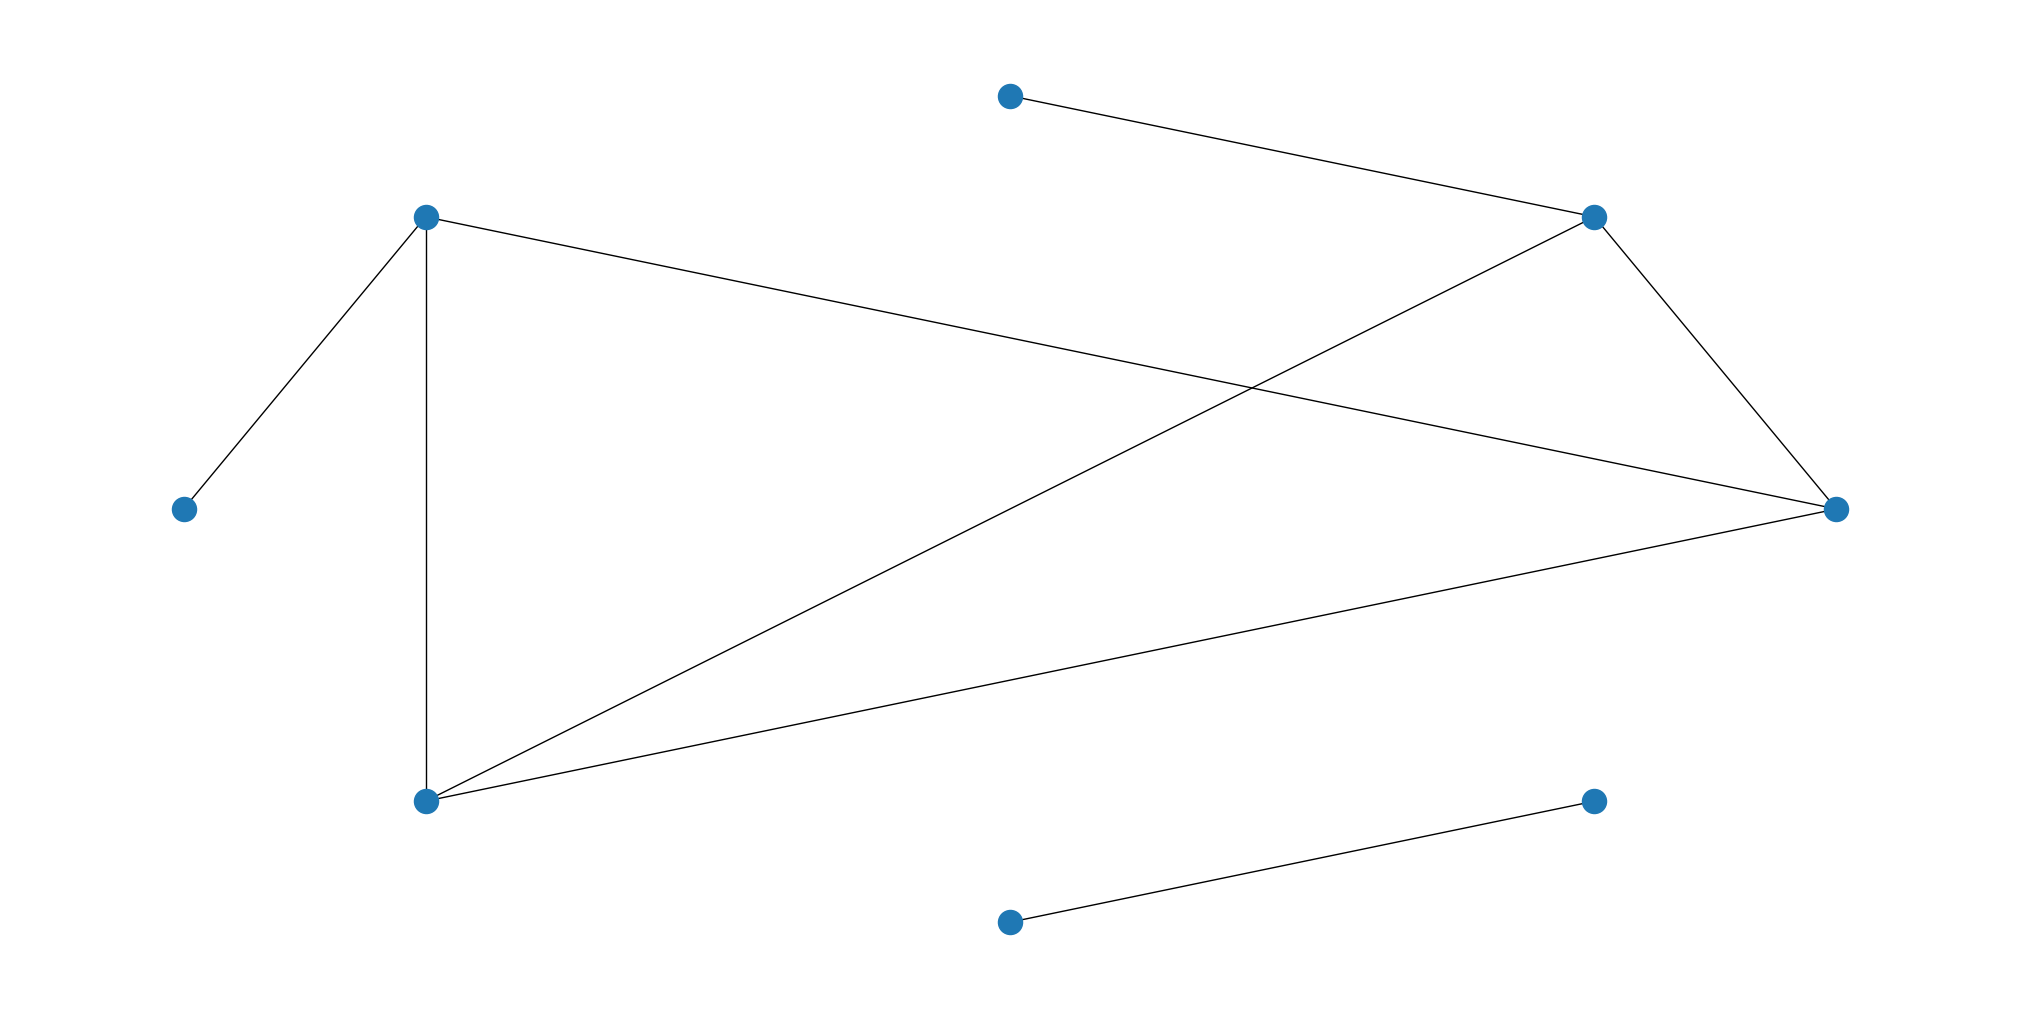

In [13]:
nx.draw(G, pos=nx.circular_layout(G))

## Reading and writing graphs in Gephi format

In [14]:
schoolday_graph = nx.read_gexf("../../data/sp_data_school_day_1_g.gexf")
print_network_information(schoolday_graph)
nx.write_gexf(schoolday_graph, "../../data/schoolday_new.gexf")

Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 236
	Number of edges: 5899


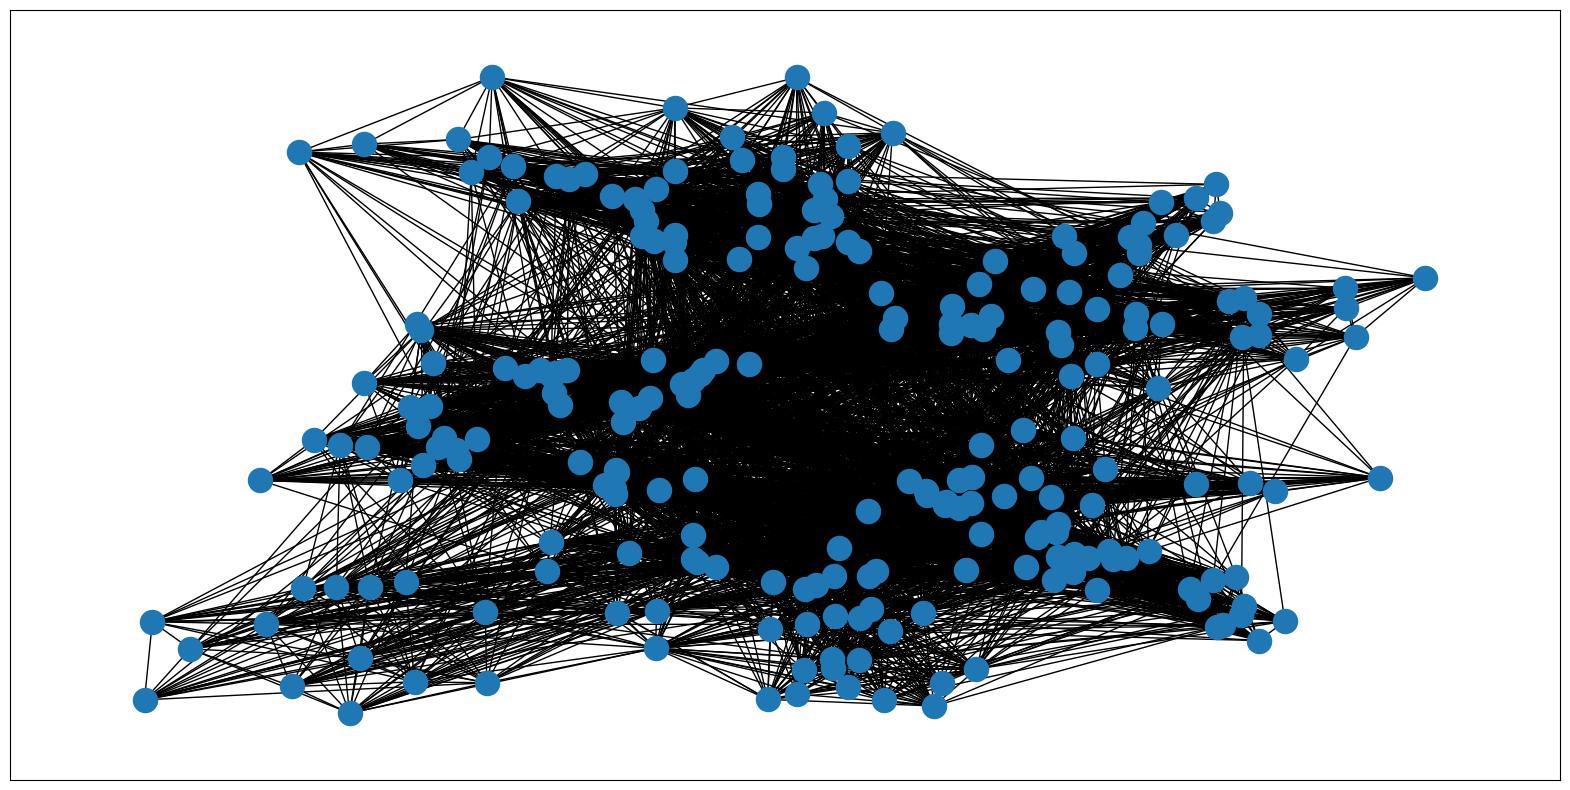

In [15]:
pos = nx.drawing.layout.spring_layout(schoolday_graph, weight="duration")
nx.draw_networkx(schoolday_graph, pos=pos, with_labels=False)
plt.show()

In [16]:
schoolday_graph.nodes(data=True)

NodeDataView({'1789': {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41, 'a': 1.0}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}, '1780': {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255, 'a': 1.0}, 'size': 10.0, 'position': {'x': 37.34756, 'y': 63.289124, 'z': 0.0}}, 'label': '1780'}, '1782': {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255, 'a': 1.0}, 'size': 10.0, 'position': {'x': -228.26913, 'y': 181.72375, 'z': 0.0}}, 'label': '1782'}, '1783': {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41, 'a': 1.0}, 'size': 10.0, 'position': {'x': -64.468575, 'y': 80.36716, 'z': 0.0}}, 'label': '1783'}, '1787': {'classname': '1A', 'gender': 'F', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41, 'a': 1.0}, 'size': 10.0, 'position': {'x': -138.05147, 'y': -21.946629, 'z': 0.0}}, 'label': '1787'}, '1546': {'classname': '4A', 'gender'

In [17]:
data = list(schoolday_graph.edges(data=True))[:10]
print(*data, sep="\n")

('1789', '1821', {'duration': 20, 'count': 1, 'id': '0'})
('1789', '1783', {'duration': 300, 'count': 13, 'id': '1'})
('1789', '1778', {'duration': 740, 'count': 23, 'id': '2'})
('1789', '1722', {'duration': 20, 'count': 1, 'id': '3'})
('1789', '1902', {'duration': 20, 'count': 1, 'id': '4'})
('1789', '1892', {'duration': 20, 'count': 1, 'id': '5'})
('1789', '1775', {'duration': 320, 'count': 13, 'id': '6'})
('1789', '1774', {'duration': 100, 'count': 5, 'id': '7'})
('1789', '1711', {'duration': 260, 'count': 8, 'id': '8'})
('1789', '1770', {'duration': 20, 'count': 1, 'id': '9'})


Group all nodes by class and then filter the first classes

In [18]:
from collections import defaultdict
people_per_class = defaultdict(list)
for (id, attributes) in list(schoolday_graph.nodes().data()):
    people_per_class[attributes["classname"]].append(id)

In [19]:
first_classes = {k: v for (k,v) in list(people_per_class.items()) if "1" in k}
first_classes.keys()

dict_keys(['1A', '1B'])

In [20]:
people_from_first_classes = set()
for (k, v) in first_classes.items():
    people_from_first_classes.update(v)

first_class_graph = nx.subgraph(schoolday_graph, people_from_first_classes)
print("First class graph")
print_network_information(first_class_graph)

First class graph
Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 47
	Number of edges: 666


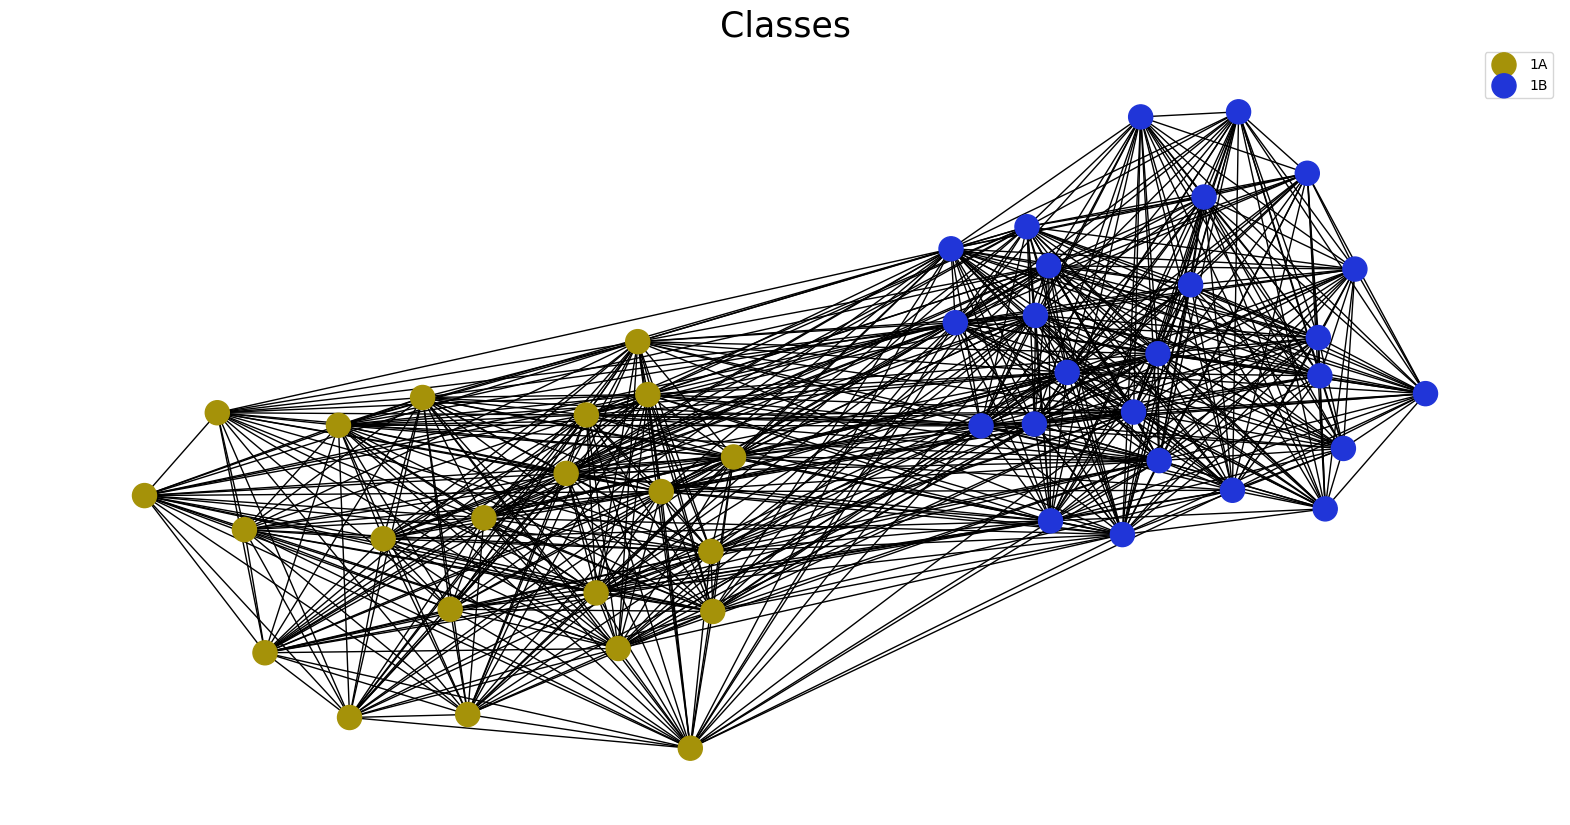

In [21]:
def random_color():
     return [random(), random(), random(), 1] 

random_colors = [random_color() for _ in range(len(list(people_per_class.keys())))]
pos = nx.drawing.layout.spring_layout(first_class_graph, weight = 'count', seed = 42)

i = 0
for (schoolclass, members) in first_classes.items():
    node_color = len(members) * [random_colors[i]]
    i = i + 1
    nx.draw_networkx_nodes(first_class_graph, pos,  nodelist=members, node_color=node_color, label = schoolclass)                                                                                                        

nx.draw_networkx_edges(first_class_graph, pos)

#set title, legend and show plot
plt.title('Classes', fontdict={'fontsize': 25})
plt.legend()
plt.axis('off')
plt.show()

In [23]:
nx.write_gexf(first_class_graph, "../../out/first_classes.gexf")